In [1]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
con = duckdb.connect("../github_stars.db")

In [37]:
query = """ 
  select * 
  from github_stars.main.fact_stars_monthly as s 
  join github_stars.main.dim_repos as r 
  on s.repo_id = r.repo_id 
    and date_end is null 
""" 
df_monthly_stars = con.sql(query).df() 
df_monthly_stars.to_csv("monthly_stars.csv")

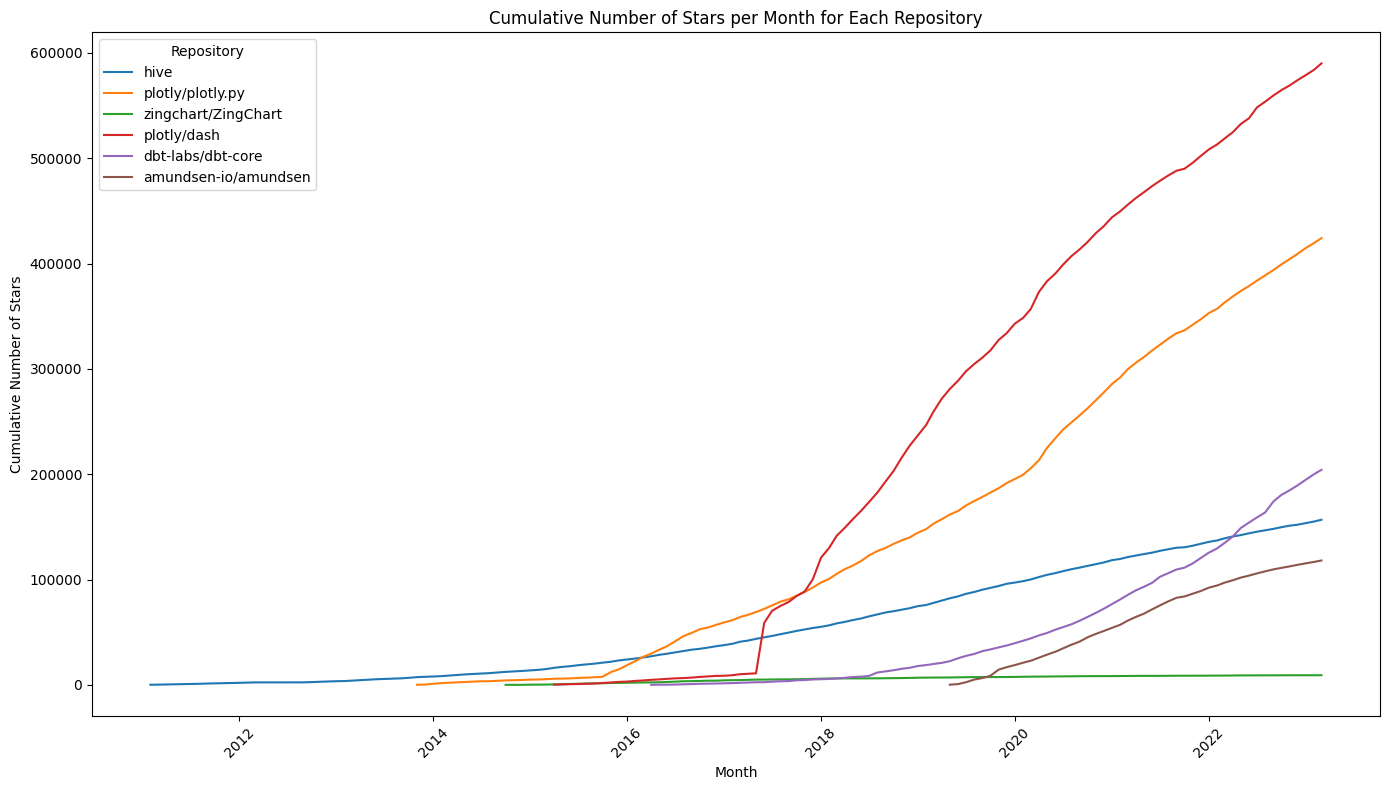

In [2]:
# Load the CSV file
file_path = '../notebooks/monthly_stars.csv'
data = pd.read_csv(file_path)

# Convert date_month to datetime format
data['date_month'] = pd.to_datetime(data['date_month'])

# Sort data by repo_id and date_month
data = data.sort_values(by=['repo_id', 'date_month'])

# Calculate the cumulative sum of stars for each repository
data['cumulative_stars'] = data.groupby('repo_id')['year_count'].cumsum()

# Plot the cumulative number of stars per month for each repository without markers
plt.figure(figsize=(14, 8))
sns.lineplot(data=data, x='date_month', y='cumulative_stars', hue='repo_name')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Cumulative Number of Stars')
plt.title('Cumulative Number of Stars per Month for Each Repository')
plt.legend(title='Repository')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()
